In [ ]:
#Importing relevant Python libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

('liu', '888', 'bin', 'liu', '888', 'bin')
{'one': 1, 'two': 2}
dict_values([1, 2])


/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
#A function for converting the energy data format from an .xvg file to a dataframe.
#Input: the path to the .xvg file.
#Output: the converted dataframe.

def Generate_Interaction_Energies_df(file_name):
    #Loading the data from the .xvg file
    y = np.loadtxt(file_name, comments = ['@', '#'], unpack = True)
    lists = []
    for i in range(len(y)):
        lists.append(list(y[i]))

    #Transferring the data to a specified dataframe (via an intermediate dictionary), whose columns correspond to the different energy terms
    d = {}
    for i in range(len(lists)):
        d[i] = lists[i]
    df = pd.DataFrame(d)
    df.set_index(0, inplace=True)
    if len(df.columns) == 4:
        df.columns = ['Coul-SR', 'LJ-SR', 'Coul-14', 'LJ-14']
    elif len(df.columns) == 12:
        df.columns = ['PP Coul-SR', 'PP LJ-SR', 'PP Coul-14', 'PP LJ-14', 'Coul-SR', 'LJ-SR', 'Coul-14', 'LJ-14', 'DD Coul-SR', 'DD LJ-SR', 'DD Coul-14', 'DD LJ-14']
    
    #Returning the dataframe
    return df

#A function for converting all .xvg files (six in total, three for A-DNA copies and three for B-DNA copies) to specified dataframes (using the Generate_Interaction_Energies_df function).
#Input: a list containing the paths to the .xvg files.
#Output: the converted dataframes.
def from_files_to_dfs_copies(six_files_list):
    #Converting each .xvg file to a specified dataframe
    df1 = Generate_Interaction_Energies_df(six_files_list[0])
    df2 = Generate_Interaction_Energies_df(six_files_list[1])
    df3 = Generate_Interaction_Energies_df(six_files_list[2])
    df4 = Generate_Interaction_Energies_df(six_files_list[3])
    df5 = Generate_Interaction_Energies_df(six_files_list[4])
    df6 = Generate_Interaction_Energies_df(six_files_list[5])

    #Returning all dataframes
    return df1, df2, df3, df4, df5, df6

In [ ]:
#Reading all .xvg files relevant to the DNA groups analysis - 5 peptide types, each placed against the minor groove of either an A-DNA or a B-DNA
dfs_list_for_groups = []

#SPECIFY THE PATHS TO THE DATA FILES IN THEIR RESPECTIVE LOCATIONS, AS INDICATED BELOW

#Reading the data of polyVal, placed against the minor groove of either A-DNA or B-DNA
Val_1000_files = ["/home_b/yoav/A_DNA_Ala_ValX_posres/A_DNA_20_AVX6_mod_gmx_1000ns_I_energy.xvg", "/home_b/yoav/B_DNA_Ala_ValX_posres/B_DNA_20_AVX6_mod_gmx_1000ns_I_energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_ValX_posres/A_DNA_20_AVX6_mod_gmx_1000ns_II_energy.xvg", "/home_b/yoav/B_DNA_Ala_ValX_posres/B_DNA_20_AVX6_mod_gmx_1000ns_II_energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_ValX_posres/A_DNA_20_AVX6_mod_gmx_1000ns_III_energy.xvg", "/home_b/yoav/B_DNA_Ala_ValX_posres/B_DNA_20_AVX6_mod_gmx_1000ns_III_energy.xvg"]
A_Val_I, B_Val_I, A_Val_II, B_Val_II, A_Val_III, B_Val_III = from_files_to_dfs_copies(Val_1000_files)
dfs_list_for_groups.append([A_Val_I, B_Val_I, A_Val_II, B_Val_II, A_Val_III, B_Val_III])

#Reading the data of polyTyr, placed against the minor groove of either A-DNA or B-DNA
Tyr_1000_files = ["/home_b/yoav/A_DNA_Ala_TyrX_posres/A_DNA_20_AYX6.1000ns.I.energy.xvg", "/home_b/yoav/B_DNA_Ala_TyrX_posres/B_DNA_20_AYX6.1000ns.I.energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_TyrX_posres/A_DNA_20_AYX6.1000ns.II.energy.xvg", "/home_b/yoav/B_DNA_Ala_TyrX_posres/B_DNA_20_AYX6.1000ns.II.energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_TyrX_posres/A_DNA_20_AYX6.1000ns.III.energy.xvg", "/home_b/yoav/B_DNA_Ala_TyrX_posres/B_DNA_20_AYX6.1000ns.III.energy.xvg"]
A_Tyr_I, B_Tyr_I, A_Tyr_II, B_Tyr_II, A_Tyr_III, B_Tyr_III = from_files_to_dfs_copies(Tyr_1000_files)
dfs_list_for_groups.append([A_Tyr_I, B_Tyr_I, A_Tyr_II, B_Tyr_II, A_Tyr_III, B_Tyr_III])

#Reading the data of polyGln, placed against the minor groove of either A-DNA or B-DNA
Gln_1000_files = ["/home_b/yoav/A_DNA_Ala_GlnX_posres/A_DNA_20_AQX6_energy_I_combined.xvg", "/home_b/yoav/B_DNA_Ala_GlnX_posres/B_DNA_20_AQX6_energy_I.xvg",
                 "/home_b/yoav/A_DNA_Ala_GlnX_posres/A_DNA_20_AQX6_energy_II.xvg", "/home_b/yoav/B_DNA_Ala_GlnX_posres/B_DNA_20_AQX6_energy_II.xvg",
                 "/home_b/yoav/A_DNA_Ala_GlnX_posres/A_DNA_20_AQX6_energy_III.xvg", "/home_b/yoav/B_DNA_Ala_GlnX_posres/B_DNA_20_AQX6_energy_III.xvg"]
A_Gln_I, B_Gln_I, A_Gln_II, B_Gln_II, A_Gln_III, B_Gln_III = from_files_to_dfs_copies(Gln_1000_files)
dfs_list_for_groups.append([A_Gln_I, B_Gln_I, A_Gln_II, B_Gln_II, A_Gln_III, B_Gln_III])

#Reading the data of poly(Asn-Val), placed against the minor groove of either A-DNA or B-DNA
NV_1000_files = ["/home_b/yoav/A_DNA_NV_X6_posres/A_DNA_20_NVX6_energy_I.xvg", "/home_b/yoav/B_DNA_NV_X6_posres/B_DNA_20_NVX6_energy_I.xvg",
                 "/home_b/yoav/A_DNA_NV_X6_posres/A_DNA_20_NVX6_energy_II.xvg", "/home_b/yoav/B_DNA_NV_X6_posres/B_DNA_20_NVX6_energy_II.xvg",
                 "/home_b/yoav/A_DNA_NV_X6_posres/A_DNA_20_NVX6_energy_III.xvg", "/home_b/yoav/B_DNA_NV_X6_posres/B_DNA_20_NVX6_energy_III.xvg"]
A_NV_I, B_NV_I, A_NV_II, B_NV_II, A_NV_III, B_NV_III = from_files_to_dfs_copies(NV_1000_files)
dfs_list_for_groups.append([A_NV_I, B_NV_I, A_NV_II, B_NV_II, A_NV_III, B_NV_III])

#Reading the data of polyArg, placed against the minor groove of either A-DNA or B-DNA
Arg_1000_files = ["/home_b/yoav/A_DNA_Ala_ArgX_posres/A_DNA_20_ARX6_mod_gmx_1000ns_I_energy.xvg", "/home_b/yoav/B_DNA_Ala_ArgX_posres/TAX10_B_DNA_ARX6_mod_gmx_1000ns_I_energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_ArgX_posres/A_DNA_20_ARX6_mod_gmx_1000ns_II_energy.xvg", "/home_b/yoav/B_DNA_Ala_ArgX_posres/TAX10_B_DNA_ARX6_mod_gmx_1000ns_II_energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_ArgX_posres/A_DNA_20_ARX6_mod_gmx_1000ns_III_energy.xvg", "/home_b/yoav/B_DNA_Ala_ArgX_posres/TAX10_B_DNA_ARX6_mod_gmx_1000ns_III_energy.xvg",]
A_Arg_I, B_Arg_I, A_Arg_II, B_Arg_II, A_Arg_III, B_Arg_III = from_files_to_dfs_copies(Arg_1000_files)
dfs_list_for_groups.append([A_Arg_I, B_Arg_I, A_Arg_II, B_Arg_II, A_Arg_III, B_Arg_III])

In [ ]:
#Unifying the copies of each DNA (A-DNA or B-DNA) to one dataframe (for each peptide)

unified_dfs_A = []; unified_dfs_B = []
copy_number = 3

for df_list in dfs_list_for_groups:
    curr_unified_df_A = []
    curr_unified_df_B = []

    for i in range(0, (copy_number * 2) - 1, 2):
        curr_unified_df_A.append(df_list[i])
        curr_unified_df_B.append(df_list[i + 1])
    
    unified_dfs_A.append(curr_unified_df_A)
    unified_dfs_B.append(curr_unified_df_B)

In [ ]:
#Calculating the relevant energy term (summed Coulomb and Lennard-Jones (LJ)) across all unified dataframes
for y in unified_dfs_A:
    for x in y:
        x['Sum_Coul_LJ_SR'] = x.copy()['Coul-SR'] + x.copy()['LJ-SR']
for y in unified_dfs_B:
    for x in y:
        x['Sum_Coul_LJ_SR'] = x.copy()['Coul-SR'] + x.copy()['LJ-SR']

In [ ]:
#A function to get the starting and ending indices of the maximal residence time, namely the time point the maximal residence time started and the the time point it ended.
#Input: the interaction energy df, from which the maximal residence time might by extracted by a calculation; the column specifying the relevant energetic term (summed Coulomb and LJ, by default); the threshold of signifcant interaction to be accounted for the residence time (1 KbT, by default)
#Output: the starting and ending indices

def get_indices_of_max_residence_time(df, energy_col = 'Sum_Coul_LJ_SR', threshold = -2.479):

    #Storing the indices/time frames of non-significant interaction and the differences between them (constitute the significant periods - the residence times)
    non_significant_indices = [i for i in range(len(df.index)) if df[energy_col][i] > threshold]
    non_significant_indices_diffs = [non_significant_indices[i + 1] - non_significant_indices[i] - 1 for i in range(len(non_significant_indices) - 1)]
    
    #In case the interaction was significant throughout all time frames, return the start and end indices of the entire simulation
    if len(non_significant_indices) == 0:
        return 0, len(df.index)
    
    #Calculating the starting (minimal) and ending (maximal) indices of the maximal residence time
    first_diff = non_significant_indices[0]
    last_diff = len(df.index) - 1 - non_significant_indices[-1]
    max_diff = np.max(non_significant_indices_diffs)
    max_ind_diff_array = np.argmax([first_diff, max_diff, last_diff])
    if max_ind_diff_array == 1:
        max_index = np.argmax(non_significant_indices_diffs)
        min_ind = non_significant_indices[max_index] + 1
        max_ind = non_significant_indices[max_index + 1]
    elif max_ind_diff_array == 0:
        min_ind = 0
        max_ind = non_significant_indices[0]
    elif max_ind_diff_array == 2:
        min_ind = non_significant_indices[-1] + 1
        max_ind = len(df.index)
    
    #Returning the indices of the maximal residence time
    return min_ind, max_ind

#Finding the maximal residence time indices for both A-DNA and B-DNA
A_min_indices_max_residence_time = []; A_max_indices_max_residence_time = []
B_min_indices_max_residence_time = []; B_max_indices_max_residence_time = []

#For A-DNA
for y in unified_dfs_A:
    curr_A_min_indices_max_residence_time = []; curr_A_max_indices_max_residence_time = []
    for x in y:
        curr_A_min_ind, curr_A_max_ind = get_indices_of_max_residence_time(x.copy())
        curr_A_min_indices_max_residence_time.append(curr_A_min_ind)
        curr_A_max_indices_max_residence_time.append(curr_A_max_ind)
    A_min_indices_max_residence_time.append(curr_A_min_indices_max_residence_time)
    A_max_indices_max_residence_time.append(curr_A_max_indices_max_residence_time)

#For B-DNA
for y in unified_dfs_B:
    curr_B_min_indices_max_residence_time = []; curr_B_max_indices_max_residence_time = []
    for x in y:
        curr_B_min_ind, curr_B_max_ind = get_indices_of_max_residence_time(x.copy())
        curr_B_min_indices_max_residence_time.append(curr_B_min_ind)
        curr_B_max_indices_max_residence_time.append(curr_B_max_ind)
    B_min_indices_max_residence_time.append(curr_B_min_indices_max_residence_time)
    B_max_indices_max_residence_time.append(curr_B_max_indices_max_residence_time)

In [ ]:
#A function for converting the groups energy data format from an .xvg file to a dataframe.
#Input: the path to the .xvg file.
#Output: the converted groups energies dataframe.
def Generate_Interaction_Energies_df(file_name):

    #Loading the data from the .xvg file
    y = np.loadtxt(file_name, comments = ['@', '#'], unpack = True)
    lists = []
    for i in range(len(y)):
        lists.append(list(y[i]))

    #Transferring the data to a specified dataframe (via an intermediate dictionary), whose columns correspond to the different energy terms of the groups
    d = {}
    for i in range(len(lists)):
        d[i] = lists[i]
    df = pd.DataFrame(d)
    df.set_index(0, inplace=True)
    if len(df.columns) == 4:
        df.columns = ['Coul-SR', 'LJ-SR', 'Coul-14', 'LJ-14']
    elif len(df.columns) == 8:
        df.columns = ['Coul-SR', 'LJ-SR', 'Coul-14', 'LJ-14', 'Ala-Coul-SR', 'Ala-LJ-SR', 'Ala-Coul-14', 'Ala-LJ-14']
    elif len(df.columns) == 12:
        df.columns = ['PB_Coul-SR', 'PB_LJ-SR', 'PB_Coul-14', 'PB_LJ-14', 'PS_Coul-SR', 'PS_LJ-SR', 'PS_Coul-14', 'PS_LJ-14', 'PPh_Coul-SR', 'PPh_LJ-SR', 'PPh_Coul-14', 'PPh_LJ-14']
    elif len(df.columns) == 24:
        df.columns = ['First Base Coul-SR', 'First Base LJ-SR', 'First Base Coul-14', 'First Base LJ-14', 'First Sugar Coul-SR', 'First Sugar LJ-SR', 'First Sugar Coul-14', 'First Sugar LJ-14', 'First Phosphate Coul-SR', 'First Phosphate LJ-SR', 'First Phosphate Coul-14', 'First Phosphate LJ-14', 'Second Base Coul-SR', 'Second Base LJ-SR', 'Second Base Coul-14', 'Second Base LJ-14', 'Second Sugar Coul-SR', 'Second Sugar LJ-SR', 'Second Sugar Coul-14', 'Second Sugar LJ-14', 'Second Phosphate Coul-SR', 'Second Phosphate LJ-SR', 'Second Phosphate Coul-14', 'Second Phosphate LJ-14']
    
    #Returning the dataframe
    return df

#SPECIFY THE PATHS TO THE DATA FILES IN THEIR RESPECTIVE LOCATIONS, AS INDICATED BELOW

#Reading the polyVal groups energies data and storing it in specified dataframes (for both A-DNA and B-DNA)
Val_A_1000_groups_files = ["/home_b/yoav/A_DNA_Ala_ValX_posres/A_DNA_20_AVX6_mod_gmx_1000ns_I_energy_groups.xvg",
                           "/home_b/yoav/A_DNA_Ala_ValX_posres/A_DNA_20_AVX6_mod_gmx_1000ns_II_energy_groups.xvg",
                           "/home_b/yoav/A_DNA_Ala_ValX_posres/A_DNA_20_AVX6_mod_gmx_1000ns_III_energy_groups.xvg"]
Val_B_1000_groups_files = ["/home_b/yoav/B_DNA_Ala_ValX_posres/B_DNA_20_AVX6_mod_gmx_1000ns_I_energy_groups.xvg",
                           "/home_b/yoav/B_DNA_Ala_ValX_posres/B_DNA_20_AVX6_mod_gmx_1000ns_II_energy_groups.xvg",
                           "/home_b/yoav/B_DNA_Ala_ValX_posres/B_DNA_20_AVX6_mod_gmx_1000ns_III_energy_groups.xvg"]
Val_A_DNA_1000_dfs = []
for file in Val_A_1000_groups_files:
    Val_A_DNA_1000_dfs.append(Generate_Interaction_Energies_df(file))
Val_B_DNA_1000_dfs = []
for file in Val_B_1000_groups_files:
    Val_B_DNA_1000_dfs.append(Generate_Interaction_Energies_df(file))

#Reading the polyTyr groups energies data and storing it in specified dataframes (for both A-DNA and B-DNA)
Tyr_A_1000_groups_files = ["/home_b/yoav/A_DNA_Ala_TyrX_posres/A_DNA_20_AYX6_energy_groups_I.xvg",
                           "/home_b/yoav/A_DNA_Ala_TyrX_posres/A_DNA_20_AYX6_energy_groups_II.xvg",
                           "/home_b/yoav/A_DNA_Ala_TyrX_posres/A_DNA_20_AYX6_energy_groups_III.xvg"]
Tyr_B_1000_groups_files = ["/home_b/yoav/B_DNA_Ala_TyrX_posres/B_DNA_20_AYX6_energy_groups_I.xvg",
                           "/home_b/yoav/B_DNA_Ala_TyrX_posres/B_DNA_20_AYX6_energy_groups_II.xvg",
                           "/home_b/yoav/B_DNA_Ala_TyrX_posres/B_DNA_20_AYX6_energy_groups_III.xvg"]
Tyr_A_DNA_1000_dfs = []
for file in Tyr_A_1000_groups_files:
    Tyr_A_DNA_1000_dfs.append(Generate_Interaction_Energies_df(file))
Tyr_B_DNA_1000_dfs = []
for file in Tyr_B_1000_groups_files:
    Tyr_B_DNA_1000_dfs.append(Generate_Interaction_Energies_df(file))

#Reading the polyGln groups energies data and storing it in specified dataframes (for both A-DNA and B-DNA)
Gln_A_1000_groups_files = ["/home_b/yoav/A_DNA_Ala_GlnX_posres/A_DNA_20_AQX6_energy_groups_I_combined.xvg",
                           "/home_b/yoav/A_DNA_Ala_GlnX_posres/A_DNA_20_AQX6_energy_groups_II.xvg",
                           "/home_b/yoav/A_DNA_Ala_GlnX_posres/A_DNA_20_AQX6_energy_groups_III.xvg"]
Gln_B_1000_groups_files = ["/home_b/yoav/B_DNA_Ala_GlnX_posres/B_DNA_20_AQX6_energy_groups_I.xvg",
                           "/home_b/yoav/B_DNA_Ala_GlnX_posres/B_DNA_20_AQX6_energy_groups_II.xvg",
                           "/home_b/yoav/B_DNA_Ala_GlnX_posres/B_DNA_20_AQX6_energy_groups_III.xvg"]
Gln_A_DNA_1000_dfs = []
for file in Gln_A_1000_groups_files:
    Gln_A_DNA_1000_dfs.append(Generate_Interaction_Energies_df(file))
Gln_B_DNA_1000_dfs = []
for file in Gln_B_1000_groups_files:
    Gln_B_DNA_1000_dfs.append(Generate_Interaction_Energies_df(file))

#Reading the poly(Asn-Val) groups energies data and storing it in specified dataframes (for both A-DNA and B-DNA)
NV_A_DNA_1000_files = ["/home_b/yoav/A_DNA_NV_X6_posres/A_DNA_20_NVX6_energy_Separated_Groups_I.xvg",
                       "/home_b/yoav/A_DNA_NV_X6_posres/A_DNA_20_NVX6_energy_Separated_Groups_II.xvg",
                       "/home_b/yoav/A_DNA_NV_X6_posres/A_DNA_20_NVX6_energy_Separated_Groups_III.xvg"]
NV_B_DNA_1000_files = ["/home_b/yoav/B_DNA_NV_X6_posres/B_DNA_20_NVX6_energy_Separated_Groups_I.xvg",
                       "/home_b/yoav/B_DNA_NV_X6_posres/B_DNA_20_NVX6_energy_Separated_Groups_II.xvg",
                       "/home_b/yoav/B_DNA_NV_X6_posres/B_DNA_20_NVX6_energy_Separated_Groups_III.xvg"]
NV_A_DNA_1000_dfs = []
for file in NV_A_DNA_1000_files:
    NV_A_DNA_1000_dfs.append(Generate_Interaction_Energies_df(file))
NV_B_DNA_1000_dfs = []
for file in NV_B_DNA_1000_files:
    NV_B_DNA_1000_dfs.append(Generate_Interaction_Energies_df(file))

#Reading the polyArg groups energies data and storing it in specified dataframes (for both A-DNA and B-DNA)
Arg_A_1000_groups_files = ["/home_b/yoav/A_DNA_Ala_ArgX_posres/A_DNA_20_ARX6_energy_groups_I.xvg",
                           "/home_b/yoav/A_DNA_Ala_ArgX_posres/A_DNA_20_ARX6_energy_groups_II.xvg",
                           "/home_b/yoav/A_DNA_Ala_ArgX_posres/A_DNA_20_ARX6_energy_groups_III.xvg"]
Arg_B_1000_groups_files = ["/home_b/yoav/B_DNA_Ala_ArgX_posres/B_DNA_20_ARX6_energy_groups_I.xvg",
                           "/home_b/yoav/B_DNA_Ala_ArgX_posres/B_DNA_20_ARX6_energy_groups_II.xvg",
                           "/home_b/yoav/B_DNA_Ala_ArgX_posres/B_DNA_20_ARX6_energy_groups_III.xvg"]
Arg_A_DNA_1000_dfs = []
for file in Arg_A_1000_groups_files:
    Arg_A_DNA_1000_dfs.append(Generate_Interaction_Energies_df(file))
Arg_B_DNA_1000_dfs = []
for file in Arg_B_1000_groups_files:
    Arg_B_DNA_1000_dfs.append(Generate_Interaction_Energies_df(file))

/tmp/ipykernel_3871851/1029598975.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(key, xy = (summing_df_significant_residence_time_phosphate_A_groupedby_means['Log_Energy'][i_key], summing_df_significant_residence_time_sugar_A_groupedby_means['Log_Energy'][i_key]), textcoords = 'offset points', ha = 'center', xytext = (10, -12), fontsize = 25)
/tmp/ipykernel_3871851/1029598975.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(key, xy = (summing_df_significant_residence_time_phosphate_A_groupedby_means['Log_Energy'][i_key], summing_df_significant_residence_time_sugar_A_groupedby_means['

,Energy,Log_Energy,Comp,Peptide,DNA,Group,Window
0,-18.474862,4.283541,-6.303133,V,A-DNA,Base,254275
1,-39.209872,5.329478,-22.560788,V,A-DNA,Sugar,254275
2,-2.421471,1.774617,-1.189751,V,A-DNA,Phosphate,254275
3,-7.996308,3.169333,-2.398463,V,A-DNA,Base,501091
4,-58.552087,5.896080,-7.649824,V,A-DNA,Sugar,501091
...,...,...,...,...,...,...,...
85,-107.363866,6.759740,NaN,R,B-DNA,Sugar,1000001
86,-175.241427,7.461409,NaN,R,B-DNA,Phosphate,1000001
87,-92.293390,6.543703,NaN,R,B-DNA,Base,1000001
88,-141.294377,7.152735,NaN,R,B-DNA,Sugar,1000001


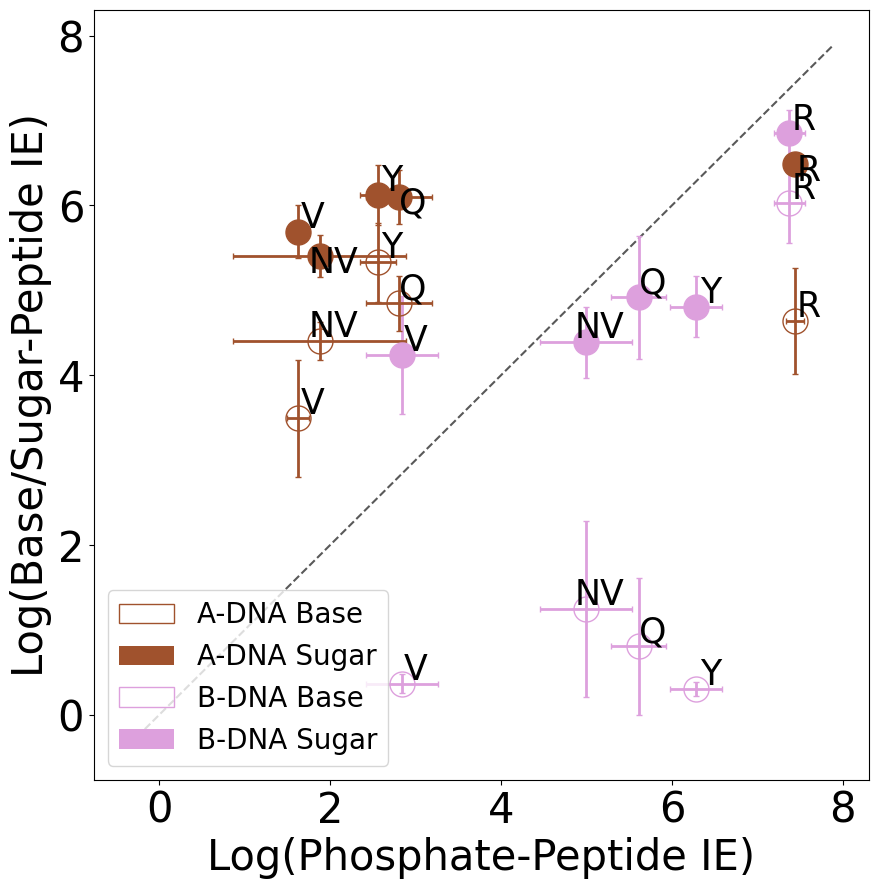

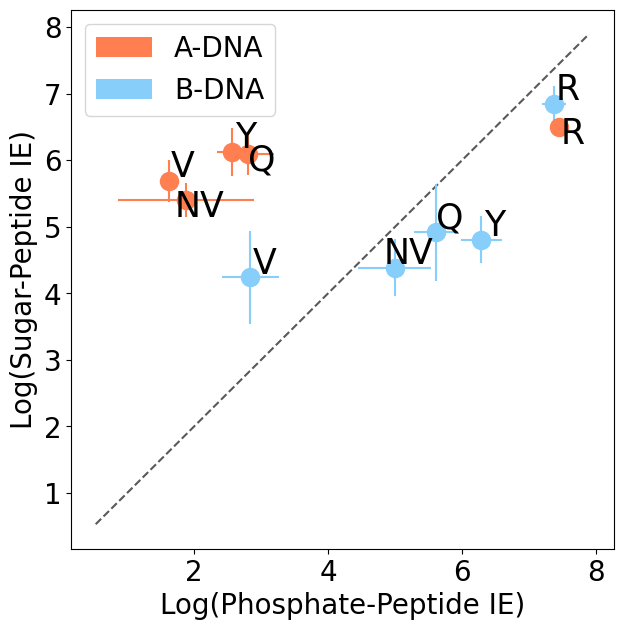

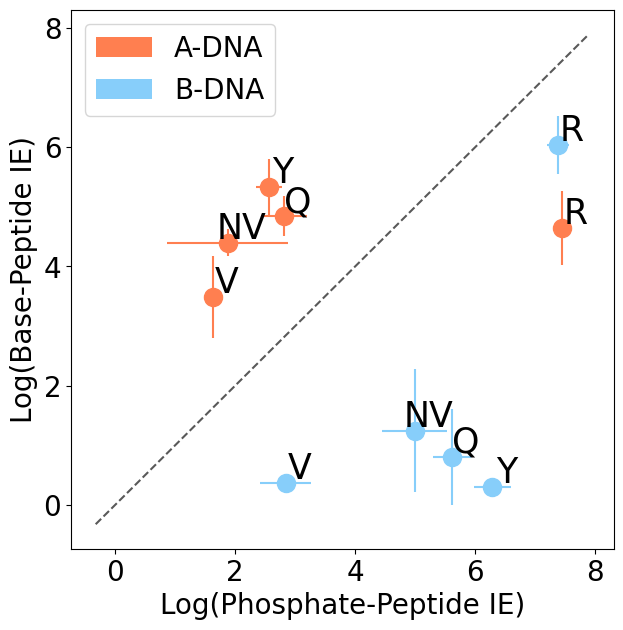

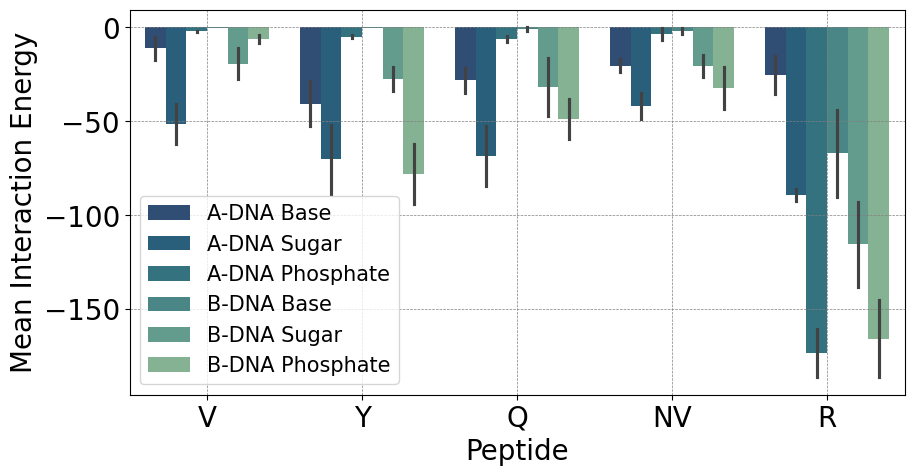

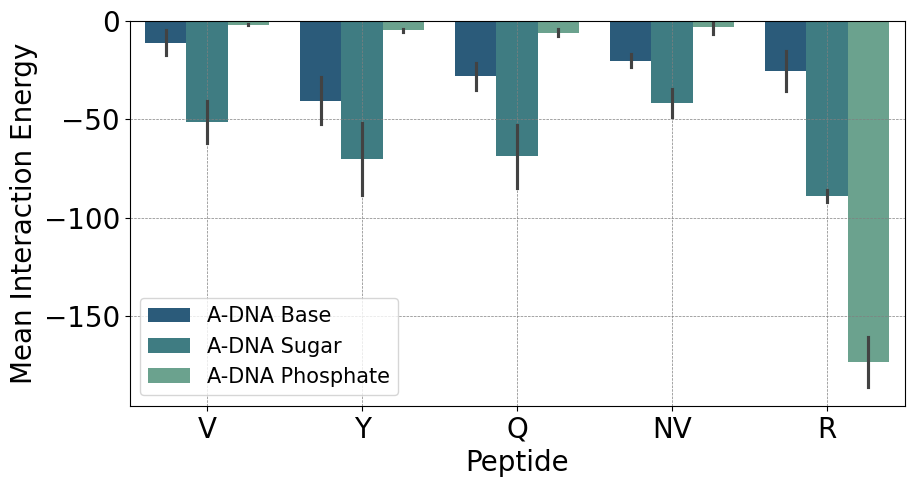

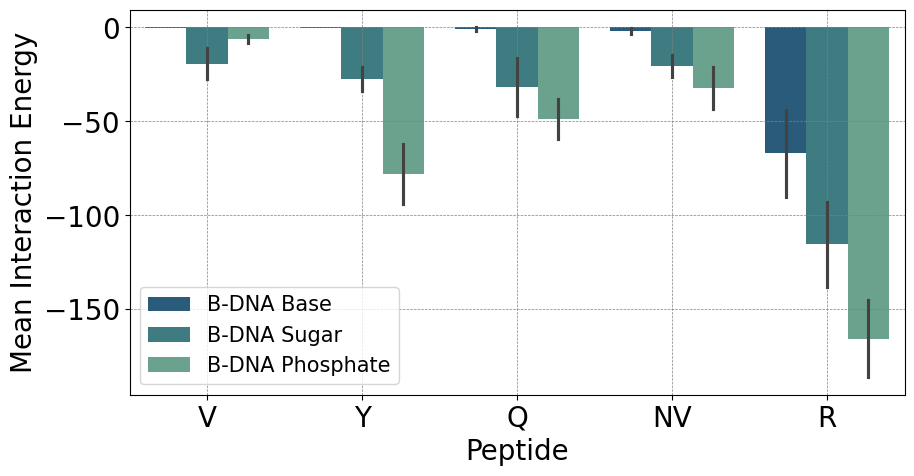

In [ ]:
#A function to get the mean interaction energy in the maximal residence period.
#Input: an energetic value dataframe; the column depicting the Coulomb energetic term; the column depicting the LJ energetic term; the time frame the maximal residence time started; the time frame the maximal residence time ended
#Ouput: the mean interaction energy in the maximal residence period
def get_average_IE_in_maximal_residence_time_window(df, Coul_col, LJ_col, min_ind, max_ind):

    window_df = df.copy().iloc[min_ind:max_ind, :]
    return np.mean(window_df[Coul_col] + window_df[LJ_col])

#A function to get the mean interaction energy not in the maximal residence period.
#Input: an energetic value dataframe; the column depicting the Coulomb energetic term; the column depicting the LJ energetic term; the time frame the maximal residence time started; the time frame the maximal residence time ended
#Ouput: the mean interaction energy not in the maximal residence period
def get_average_IE_not_in_maximal_residence_time_window(df, Coul_col, LJ_col, min_ind, max_ind):

    window_df_left = df.copy().iloc[:min_ind, :]
    window_df_right = df.copy().iloc[max_ind:, :]
    window_df = pd.concat([window_df_left, window_df_right], axis = 0, ignore_index = True)
    return np.mean(window_df[Coul_col] + window_df[LJ_col])

#A function to get the mean interaction energies of the maximal residence periods of all peptides and to plot those mean interaction energies of the peptides with each DNA group (base, sugar, phosphate).
#Input: an energetic value dataframe list, for all peptides and for the three DNA groups; all starting indices of the residence times; all ending indices of the residence times; the order of DNA conformations to be plotted; the order of the peptides to be plotted; the order of the DNA groups to be plotted; short names for DNA groups; the number of copies per system (3, by default)
#Ouput: a summing dataframe containing the mean interaction energies of the maximal residence periods
def get_all_averages_IEs(dfs_groups_list, min_indices_list, max_indices_list, DNA_order = ['A-DNA', 'B-DNA'], peptide_order = ['V', 'Y', 'Q', 'NV', 'R'], groups_order = ['Base', 'Sugar', 'Phosphate'], short_groups = ['B', 'S', 'Ph'], copies_num = 3):

    #Generating a summing dataframe, containing the mean interaction energies in the residence periods
    average_IEs = []; average_IEs_comp = []; peptides = []; DNAs = []; chemical_groups = []; window_lengths = []
    for i_DNA, dfs_groups in enumerate(dfs_groups_list):
        curr_DNA = DNA_order[i_DNA]
        for i_peptide in range(len(dfs_groups)):
            curr_peptide = peptide_order[i_peptide]
            for i_copy in range(copies_num):
                for i_group in range(len(groups_order)):
                    curr_group = groups_order[i_group]
                    curr_min_ind = min_indices_list[i_DNA][i_peptide][i_copy]
                    curr_max_ind = max_indices_list[i_DNA][i_peptide][i_copy]
                    if len(curr_peptide) == 1:
                        curr_coul_col = 'P' + short_groups[i_group] + '_Coul-SR'
                        curr_lj_col = 'P' + short_groups[i_group] + '_LJ-SR'
                        average_IEs.append(get_average_IE_in_maximal_residence_time_window(dfs_groups[i_peptide][i_copy], curr_coul_col, curr_lj_col, curr_min_ind, curr_max_ind))
                        average_IEs_comp.append(get_average_IE_not_in_maximal_residence_time_window(dfs_groups[i_peptide][i_copy], curr_coul_col, curr_lj_col, curr_min_ind, curr_max_ind))
                    elif len(curr_peptide) == 2:
                        first_coul_col = 'First ' + curr_group + ' Coul-SR'
                        first_lj_col = 'First ' + curr_group + ' LJ-SR'
                        first_mean = get_average_IE_in_maximal_residence_time_window(dfs_groups[i_peptide][i_copy], first_coul_col, first_lj_col, curr_min_ind, curr_max_ind)
                        first_mean_comp = get_average_IE_not_in_maximal_residence_time_window(dfs_groups[i_peptide][i_copy], first_coul_col, first_lj_col, curr_min_ind, curr_max_ind)
                        second_coul_col = 'Second ' + curr_group + ' Coul-SR'
                        second_lj_col = 'Second ' + curr_group + ' LJ-SR'
                        second_mean = get_average_IE_in_maximal_residence_time_window(dfs_groups[i_peptide][i_copy], second_coul_col, second_lj_col, curr_min_ind, curr_max_ind)
                        second_mean_comp = get_average_IE_not_in_maximal_residence_time_window(dfs_groups[i_peptide][i_copy], second_coul_col, second_lj_col, curr_min_ind, curr_max_ind)
                        average_IEs.append((first_mean + second_mean) / 2)
                        average_IEs_comp.append((first_mean_comp + second_mean_comp) / 2)
                    peptides.append(curr_peptide)
                    DNAs.append(curr_DNA)
                    chemical_groups.append(curr_group)
                    window_lengths.append(curr_max_ind - curr_min_ind)
    summing_dict = {'Energy': average_IEs, 'Log_Energy': [np.log2(-x + 1) for x in average_IEs], 'Comp': average_IEs_comp, 'Peptide': peptides, 'DNA': DNAs, 'Group': chemical_groups, 'Window': window_lengths}
    summing_df = pd.DataFrame(summing_dict)

    #Splitting the summing dataframe to two, one for A-DNA and second for B-DNA
    summing_df_A = summing_df.copy().loc[summing_df.copy()['DNA'] == 'A-DNA']
    summing_df_B = summing_df.copy().loc[summing_df.copy()['DNA'] == 'B-DNA']

    #Filtering out non-signifcant interactions based on a threshold of the length of the residence time
    max_res_time_thres = 0 #The threshold for defining non-signifcant interaction - 10000 (10 ns) was used to generate panel 4E
    summing_df_A_significant_residence_time = summing_df_A.copy().loc[summing_df_A.copy()['Window'] > max_res_time_thres].reset_index()
    summing_df_B_significant_residence_time = summing_df_B.copy().loc[summing_df_B.copy()['Window'] > max_res_time_thres].reset_index()

    #Grouping by mean and standard deviation the peptide-base interaction energies
    summing_df_significant_residence_time_base_A = summing_df_A_significant_residence_time.copy().loc[summing_df_A_significant_residence_time.copy()['Group'] == 'Base'].reset_index()
    summing_df_significant_residence_time_base_A_groupedby = summing_df_significant_residence_time_base_A.copy().groupby(['Peptide', 'DNA', 'Group'])
    summing_df_significant_residence_time_base_B = summing_df_B_significant_residence_time.copy().loc[summing_df_B_significant_residence_time.copy()['Group'] == 'Base'].reset_index()
    summing_df_significant_residence_time_base_B_groupedby = summing_df_significant_residence_time_base_B.copy().groupby(['Peptide', 'DNA', 'Group'])
    summing_df_significant_residence_time_base_A_groupedby_means = summing_df_significant_residence_time_base_A_groupedby.mean()
    summing_df_significant_residence_time_base_A_groupedby_stds = summing_df_significant_residence_time_base_A_groupedby.std()
    summing_df_significant_residence_time_base_B_groupedby_means = summing_df_significant_residence_time_base_B_groupedby.mean()
    summing_df_significant_residence_time_base_B_groupedby_stds = summing_df_significant_residence_time_base_B_groupedby.std()
    
    #Grouping by mean and standard deviation the peptide-sugar interaction energies
    summing_df_significant_residence_time_sugar_A = summing_df_A_significant_residence_time.copy().loc[summing_df_A_significant_residence_time.copy()['Group'] == 'Sugar'].reset_index()
    summing_df_significant_residence_time_sugar_A_groupedby = summing_df_significant_residence_time_sugar_A.copy().groupby(['Peptide', 'DNA', 'Group'])
    summing_df_significant_residence_time_sugar_B = summing_df_B_significant_residence_time.copy().loc[summing_df_B_significant_residence_time.copy()['Group'] == 'Sugar'].reset_index()
    summing_df_significant_residence_time_sugar_B_groupedby = summing_df_significant_residence_time_sugar_B.copy().groupby(['Peptide', 'DNA', 'Group'])
    summing_df_significant_residence_time_sugar_A_groupedby_means = summing_df_significant_residence_time_sugar_A_groupedby.mean()
    summing_df_significant_residence_time_sugar_A_groupedby_stds = summing_df_significant_residence_time_sugar_A_groupedby.std()
    summing_df_significant_residence_time_sugar_B_groupedby_means = summing_df_significant_residence_time_sugar_B_groupedby.mean()
    summing_df_significant_residence_time_sugar_B_groupedby_stds = summing_df_significant_residence_time_sugar_B_groupedby.std()

    #Grouping by mean and standard deviation the peptide-phosphate interaction energies
    summing_df_significant_residence_time_phosphate_A = summing_df_A_significant_residence_time.copy().loc[summing_df_A_significant_residence_time.copy()['Group'] == 'Phosphate'].reset_index()
    summing_df_significant_residence_time_phosphate_A_groupedby = summing_df_significant_residence_time_phosphate_A.copy().groupby(['Peptide', 'DNA', 'Group'])
    summing_df_significant_residence_time_phosphate_B = summing_df_B_significant_residence_time.copy().loc[summing_df_B_significant_residence_time.copy()['Group'] == 'Phosphate'].reset_index()
    summing_df_significant_residence_time_phosphate_B_groupedby = summing_df_significant_residence_time_phosphate_B.copy().groupby(['Peptide', 'DNA', 'Group'])
    summing_df_significant_residence_time_phosphate_A_groupedby_means = summing_df_significant_residence_time_phosphate_A_groupedby.mean()
    summing_df_significant_residence_time_phosphate_A_groupedby_stds = summing_df_significant_residence_time_phosphate_A_groupedby.std()
    summing_df_significant_residence_time_phosphate_B_groupedby_means = summing_df_significant_residence_time_phosphate_B_groupedby.mean()
    summing_df_significant_residence_time_phosphate_B_groupedby_stds = summing_df_significant_residence_time_phosphate_B_groupedby.std()

    #Defining parameters for plotting
    plt.rcParams['pdf.fonttype'] = 42

    #Generating a new figure
    fig, ax = plt.subplots(figsize = (10, 10))

    #Plotting the energetic values of each peptide related to the sugars vs. the ones related to the phosphates
    sns.scatterplot(ax = ax, x = summing_df_significant_residence_time_phosphate_A_groupedby_means['Log_Energy'], y = summing_df_significant_residence_time_sugar_A_groupedby_means['Log_Energy'], marker = 'o', label = 'A-DNA', color = 'sienna', ec = 'b', linewidths = 0.5)
    sns.scatterplot(ax = ax, x = summing_df_significant_residence_time_phosphate_B_groupedby_means['Log_Energy'], y = summing_df_significant_residence_time_sugar_B_groupedby_means['Log_Energy'], marker = 'o', label = 'B-DNA', color = 'plum', ec = 'b', linewidths = 0.5)
    ax.errorbar(x = summing_df_significant_residence_time_phosphate_A_groupedby_means['Log_Energy'], y = summing_df_significant_residence_time_sugar_A_groupedby_means['Log_Energy'], xerr = summing_df_significant_residence_time_phosphate_A_groupedby_stds['Log_Energy'],  yerr = summing_df_significant_residence_time_sugar_A_groupedby_stds['Log_Energy'], fmt = 'o', color = 'sienna', markersize = 18, capthick = 1, capsize = 2, elinewidth = 2)
    ax.errorbar(x = summing_df_significant_residence_time_phosphate_B_groupedby_means['Log_Energy'], y = summing_df_significant_residence_time_sugar_B_groupedby_means['Log_Energy'], xerr = summing_df_significant_residence_time_phosphate_B_groupedby_stds['Log_Energy'],  yerr = summing_df_significant_residence_time_sugar_B_groupedby_stds['Log_Energy'], fmt = 'o', color = 'plum', markersize = 18, capthick = 1, capsize = 2, elinewidth = 2)
    
    #Adding the peptide identity (core amino acid) as annotations
    for i_key, key in enumerate([key[0] for key, _ in summing_df_significant_residence_time_sugar_A_groupedby]):
        if key == 'R' or key == 'NV' or key == 'Q':
            ax.annotate(key, xy = (summing_df_significant_residence_time_phosphate_A_groupedby_means['Log_Energy'][i_key], summing_df_significant_residence_time_sugar_A_groupedby_means['Log_Energy'][i_key]), textcoords = 'offset points', ha = 'center', xytext = (10, -12), fontsize = 25)
        else:
            ax.annotate(key, xy = (summing_df_significant_residence_time_phosphate_A_groupedby_means['Log_Energy'][i_key], summing_df_significant_residence_time_sugar_A_groupedby_means['Log_Energy'][i_key]), textcoords = 'offset points', ha = 'center', xytext = (10, 3), fontsize = 25)
    for i_key, key in enumerate([key[0] for key, _ in summing_df_significant_residence_time_sugar_B_groupedby]):
        ax.annotate(key, xy = (summing_df_significant_residence_time_phosphate_B_groupedby_means['Log_Energy'][i_key], summing_df_significant_residence_time_sugar_B_groupedby_means['Log_Energy'][i_key]), textcoords = 'offset points', ha = 'center', xytext = (10, 3), fontsize = 25)
    
    #Plotting the energetic values of each peptide related to the bases vs. the ones related to the phosphates
    sns.scatterplot(ax = ax, x = summing_df_significant_residence_time_phosphate_A_groupedby_means['Log_Energy'], y = summing_df_significant_residence_time_base_A_groupedby_means['Log_Energy'], marker = 'o', label = 'A-DNA', color = 'sienna', ec = 'b', linewidths = 0.5)
    sns.scatterplot(ax = ax, x = summing_df_significant_residence_time_phosphate_B_groupedby_means['Log_Energy'], y = summing_df_significant_residence_time_base_B_groupedby_means['Log_Energy'], marker = 'o', label = 'B-DNA', color = 'plum', ec = 'b', linewidths = 0.5)
    ax.errorbar(x = summing_df_significant_residence_time_phosphate_A_groupedby_means['Log_Energy'], y = summing_df_significant_residence_time_base_A_groupedby_means['Log_Energy'], xerr = summing_df_significant_residence_time_phosphate_A_groupedby_stds['Log_Energy'], yerr = summing_df_significant_residence_time_base_A_groupedby_stds['Log_Energy'], fmt = 'o', markerfacecolor = 'none', markeredgecolor = 'sienna', color = 'sienna', markersize = 18, capthick = 1, capsize = 2, elinewidth = 2)
    ax.errorbar(x = summing_df_significant_residence_time_phosphate_B_groupedby_means['Log_Energy'], y = summing_df_significant_residence_time_base_B_groupedby_means['Log_Energy'], xerr = summing_df_significant_residence_time_phosphate_B_groupedby_stds['Log_Energy'], yerr = summing_df_significant_residence_time_base_B_groupedby_stds['Log_Energy'], fmt = 'o', markerfacecolor = 'none', markeredgecolor = 'plum', color = 'plum', markersize = 18, capthick = 1, capsize = 2, elinewidth = 2)
    
    #Adding the peptide identity (core amino acid) as annotations
    for i_key, key in enumerate([key[0] for key, _ in summing_df_significant_residence_time_base_A_groupedby]):
        ax.annotate(key, xy = (summing_df_significant_residence_time_phosphate_A_groupedby_means['Log_Energy'][i_key], summing_df_significant_residence_time_base_A_groupedby_means['Log_Energy'][i_key]), textcoords = 'offset points', ha = 'center', xytext = (10, 3), fontsize = 25)
    for i_key, key in enumerate([key[0] for key, _ in summing_df_significant_residence_time_base_B_groupedby]):
        ax.annotate(key, xy = (summing_df_significant_residence_time_phosphate_B_groupedby_means['Log_Energy'][i_key], summing_df_significant_residence_time_base_B_groupedby_means['Log_Energy'][i_key]), textcoords = 'offset points', ha = 'center', xytext = (10, 3), fontsize = 25)

    #Defining parameters for drawing
    ax.set_xlabel('Log(Phosphate-Peptide IE)', size = 30)
    ax.set_ylabel('Log(Base & Sugar-Peptide IE)', size = 30)
    ax.tick_params(axis = 'x', labelsize = 30)
    ax.tick_params(axis = 'y', labelsize = 30)
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, 'k--', alpha = 0.65, zorder = 0)
    legend_elements = [mpatches.Circle((50, 50), 2, fill = False, edgecolor = 'sienna', label = 'A-DNA Base'), mpatches.Circle((50, 50), 2, facecolor = 'sienna', label = 'A-DNA Sugar'), mpatches.Circle((50, 50), 2, fill = False, edgecolor = 'plum', label = 'B-DNA Base'), mpatches.Circle((50, 50),  2, facecolor = 'plum', label = 'B-DNA Sugar')]
    ax.legend(handles = legend_elements, labels = ['A-DNA Base', 'A-DNA Sugar', 'B-DNA Base', 'B-DNA Sugar'], fontsize = 20)
    
    #Saving the figure
    fig.savefig('scatter_PSB_A_B_DNA_groups_non_filtered_FOR_UPLOAD.pdf', format = 'pdf')

    #Returning the summing dataframe
    return summing_df

#Defining the lists of dataframes depicting the energetic values and maximal residence time indices for plotting the group energy values
A_DNA_dfs_groups = [Val_A_DNA_1000_dfs, Tyr_A_DNA_1000_dfs, Gln_A_DNA_1000_dfs, NV_A_DNA_1000_dfs, Arg_A_DNA_1000_dfs]
B_DNA_dfs_groups = [Val_B_DNA_1000_dfs, Tyr_B_DNA_1000_dfs, Gln_B_DNA_1000_dfs, NV_B_DNA_1000_dfs, Arg_B_DNA_1000_dfs]
A_B_dfs_groups = [A_DNA_dfs_groups, B_DNA_dfs_groups]
A_B_min_indices = [A_min_indices_max_residence_time, B_min_indices_max_residence_time]
A_B_max_indices = [A_max_indices_max_residence_time, B_max_indices_max_residence_time]

#Plotting the group energy values
summing_df = get_all_averages_IEs(A_B_dfs_groups, A_B_min_indices, A_B_max_indices)